<a href="https://colab.research.google.com/github/Vilashnee/Jarvis-AI/blob/master/MovieLabel25GB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ls

drive/  sample_data/


In [ ]:
!pip install tensorflow-gpu==2.0.0-rc0

In [4]:

import tensorflow as tf
from tensorflow.keras import Sequential

In [5]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [27]:
print(tf.__version__)

2.0.0-rc0


In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [9]:

!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Total 7873 (delta 0), reused 0 (delta 0), pack-reused 7873
Receiving objects: 100% (7873/7873), 246.59 MiB | 19.12 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


In [10]:
data = pd.read_csv('/content/Movies-Poster_Dataset/train.csv')

In [11]:

data.shape

(7254, 27)

In [15]:
img_width = 350
img_height = 350

X = []

for i in tqdm(range(data.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 7254/7254 [00:25<00:00, 287.46it/s]


In [16]:

X.shape

(7254, 350, 350, 3)

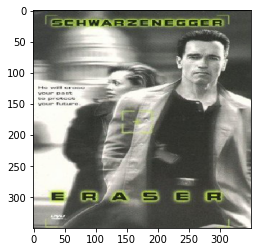

In [17]:
plt.imshow(X[2250])

In [18]:
y = data.drop(['Id', 'Genre'], axis = 1)
y = y.to_numpy()
y.shape

(7254, 25)

In [19]:
X_train , X_test , y_train , y_test =  train_test_split(X,y,random_state = 0,test_size = 0.15)
X_train[0].shape

(350, 350, 3)

In [20]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [21]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

In [22]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [23]:

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
6165/6165 [==============================] - 23s 4ms/sample - loss: 0.6968 - accuracy: 0.6389 - val_loss: 0.5535 - val_accuracy: 0.7909
Epoch 2/5
6165/6165 [==============================] - 14s 2ms/sample - loss: 0.3116 - accuracy: 0.8907 - val_loss: 0.2592 - val_accuracy: 0.9087
Epoch 3/5
6165/6165 [==============================] - 14s 2ms/sample - loss: 0.2612 - accuracy: 0.9064 - val_loss: 0.2546 - val_accuracy: 0.9077
Epoch 4/5
6165/6165 [==============================] - 14s 2ms/sample - loss: 0.2524 - accuracy: 0.9085 - val_loss: 0.4459 - val_accuracy: 0.8829
Epoch 5/5
6165/6165 [==============================] - 14s 2ms/sample - loss: 0.2467 - accuracy: 0.9098 - val_loss: 0.5125 - val_accuracy: 0.8672


In [24]:

def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

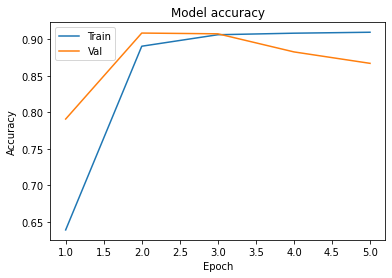

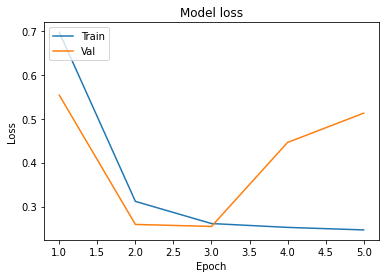

In [25]:

plot_learningCurve(history, 5)

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Thriller
Action


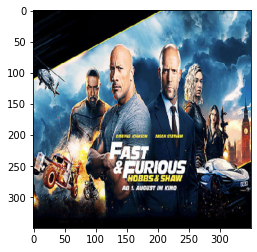

In [26]:

img = image.load_img('/content/Movies-Poster_Dataset/fast.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]
print(classes)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])